<a href="https://colab.research.google.com/github/BuuMinhDucTran/AI_Robotics/blob/main/robot_2dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
from re import U
import matplotlib.pyplot as plt
from math import sin, cos, radians
import csv
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import keras 
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

Create data for file csv

In [ ]:
u =[]
for i in range(0,181,1):
  z=[]
  for j in range(0,181,1):
    Px=50*cos(radians(i))+40*cos(radians(i+j))
    Py=50*sin(radians(i))+40*sin(radians(i+j))
    z.append(np.array((i,j,Px,Py)))
  u.extend(z)

Create file

In [ ]:
header = ['alpha', 'beta', 'Px', 'Py']
#header = [ 'x', 'y']
with open('robot_2dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)

In [ ]:
data = pd.read_csv('robot_2dof.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]
x=numpy_dataset[:,2:]
x=(x+90)/180
y=(y+180)/360
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train[0])
print(y_train[0])

[0.87238258 0.8223133 ]
[0.58888889 0.55555556]


In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Preprocessing Data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train)
print(x_train.shape)
print(y_train.shape)

[[0.11486743 0.32017782]
 [0.4156517  0.56458896]
 [0.4048261  0.5084116 ]
 ...
 [0.8823711  0.7971755 ]
 [0.36419043 0.6791407 ]
 [0.08693026 0.3539222 ]]
(26208, 2)
(26208, 2)


Create Model

In [ ]:
model=Sequential()
model.add(Dense(128,kernel_initializer='normal', activation='relu',input_shape=(2,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 11,282
Trainable params: 11,282
Non-trainable params: 0
_________________________________________________________________


**Training model**

In [ ]:
model.compile(loss = 'mse',optimizer = 'Adam', metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 32, epochs = 50, verbose = 1, validation_split = 0.2)

Epoch 1/50
656/656 [==============================] - 7s 5ms/step - loss: 0.0751 - accuracy: 0.8869 - val_loss: 0.0726 - val_accuracy: 0.9365
Epoch 2/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0735 - accuracy: 0.9533 - val_loss: 0.0723 - val_accuracy: 0.9630
Epoch 3/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0734 - accuracy: 0.9604 - val_loss: 0.0722 - val_accuracy: 0.9699
Epoch 4/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9676 - val_loss: 0.0722 - val_accuracy: 0.9639
Epoch 5/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9674 - val_loss: 0.0722 - val_accuracy: 0.9704
Epoch 6/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9690 - val_loss: 0.0722 - val_accuracy: 0.9674
Epoch 7/50
656/656 [==============================] - 3s 5ms/step - loss: 0.0733 - accuracy: 0.9724 - val_loss: 0.0722 - val_accuracy: 0.9666
Epoch 

Drawing Configure

[[0.7012991  0.2987009 ]
 [0.38000962 0.61999035]
 [0.5832932  0.4167068 ]
 ...
 [0.4664745  0.53352547]
 [0.64402664 0.3559734 ]
 [0.57392466 0.4260753 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


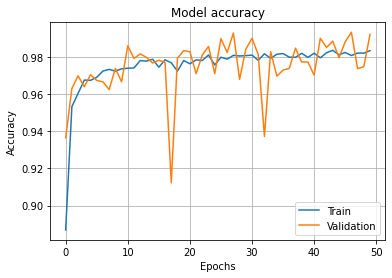

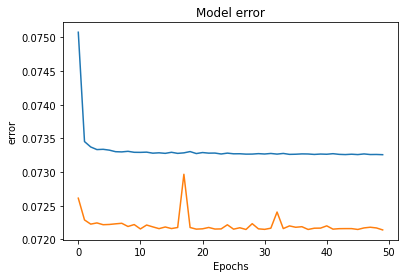

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
y_pred = model.predict(x_test)
print(y_pred)
pd.DataFrame(history.history)
plt.plot(figsize=(8,5))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

In [ ]:
px_test = (float(input("Px: "))+110.0)/220.0
py_test = (float(input("Py: "))+110.0)/220.0
test = model.predict([[px_test,py_test]])
t1 = test[0][0]*180
t2 = test[0][1]*90
Px=50*cos(radians(t1))+40*cos(radians(t1+t2))
Py=50*sin(radians(t1))+40*sin(radians(t1+t2))
print('x = ',Px,'y = ',Py)
print(t1,t2)

Px: 60
Py: 50
x =  -3.5225638268925437 y =  79.50683485844391
67.8954541683197 56.05227291584015
